In [384]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

Для початку, запишемо вхідні дані у dataframe.

In [385]:
df = pd.read_csv('saveecobot_24188.csv', header=0, sep=',', dtype={'device_id': 'int','phenomenon': 'str','value': 'float','logged_at': 'str','value_text': 'str'})
df['logged_at'] = pd.to_datetime(df['logged_at'])
df.head(29)

,device_id,phenomenon,value,logged_at,value_text
0,24188,temperature,0.5100,2024-02-10 16:30:00,NaN
1,24188,pressure,991.6700,2024-02-10 16:30:00,NaN
2,24188,formaldehyde_ppb,0.0000,2024-02-10 16:30:00,NaN
3,24188,formaldehyde_ug,0.0000,2024-02-10 16:30:00,NaN
4,24188,tvoc_ppb,117.9200,2024-02-10 16:30:00,NaN
5,24188,uv,0.4600,2024-02-10 16:30:00,NaN
6,24188,pm100,27.0000,2024-02-10 16:30:00,NaN
7,24188,pm1,19.6000,2024-02-10 16:30:00,NaN
8,24188,pm10,26.3100,2024-02-10 16:30:00,NaN
9,24188,pm25,18.9600,2024-02-10 16:30:00,NaN


Таке представлення даних незручне і несе непотрібну інформацію - відформатуємо таблицю.

In [386]:
df.drop(columns=['device_id', 'value_text'], inplace=True)
df.dropna(axis=0, subset='value', inplace=True)
df = df.pivot_table(index='logged_at', columns='phenomenon', values='value')
df.head(5)

phenomenon,co2_mg,co2_ppm,co_ppb,co_ug,formaldehyde_ppb,formaldehyde_ug,h2s_ppb,h2s_ug,humidity,leq,...,pm1,pm10,pm100,pm25,pressure,so2_ppb,so2_ug,temperature,tvoc_ppb,uv
logged_at,,,,,,,,,,,,,,,,,,,,,
2024-02-10 16:30:00,876.1473,456.38,253.42,309.6372,0.0,0.0,0.0,0.0,87.70,61.09,...,19.60,26.31,27.00,18.96,991.67,5.60,15.6500,0.51,117.92,0.46
2024-02-10 16:45:00,862.0196,449.00,257.61,314.7714,0.0,0.0,0.0,0.0,87.80,61.10,...,17.40,23.40,24.40,16.70,991.68,5.46,15.2595,0.50,117.50,0.70
2024-02-10 17:00:00,868.5429,452.44,257.85,315.0352,0.0,0.0,0.0,0.0,87.94,61.25,...,15.90,21.83,22.60,15.54,991.66,4.93,13.7770,0.52,116.67,0.61
2024-02-10 17:15:00,887.4731,462.17,240.28,293.6519,0.0,0.0,0.0,0.0,88.03,60.11,...,15.82,21.20,22.36,15.28,991.76,4.63,12.9423,0.47,117.50,0.50
2024-02-10 17:30:00,877.1345,456.60,253.79,310.2891,0.0,0.0,0.0,0.0,88.10,59.50,...,15.70,21.00,22.00,15.10,991.91,5.01,14.0102,0.40,117.08,0.50


Оскільки обрана станція збирала дані про занадто велику кількість показників, залишимо серед них лише цікаві нам.

In [387]:
col = ['temperature','pressure','pm100','pm1','pm10','pm25','humidity','so2_ppb','no2_ppb','o3_ppb','co2_ppm','uv']
df.drop(columns=[c for c in df.columns if c not in col], inplace=True)
df.head(5)

phenomenon,co2_ppm,humidity,no2_ppb,o3_ppb,pm1,pm10,pm100,pm25,pressure,so2_ppb,temperature,uv
logged_at,,,,,,,,,,,,
2024-02-10 16:30:00,456.38,87.70,2.95,19.73,19.60,26.31,27.00,18.96,991.67,5.60,0.51,0.46
2024-02-10 16:45:00,449.00,87.80,0.62,20.10,17.40,23.40,24.40,16.70,991.68,5.46,0.50,0.70
2024-02-10 17:00:00,452.44,87.94,4.84,18.81,15.90,21.83,22.60,15.54,991.66,4.93,0.52,0.61
2024-02-10 17:15:00,462.17,88.03,3.54,18.37,15.82,21.20,22.36,15.28,991.76,4.63,0.47,0.50
2024-02-10 17:30:00,456.60,88.10,5.91,17.57,15.70,21.00,22.00,15.10,991.91,5.01,0.40,0.50


Для пошуку кореляцій між показниками обчислимо коефіцієнт Пірсона для усіх пар і побудуємо за ним теплову мапу.

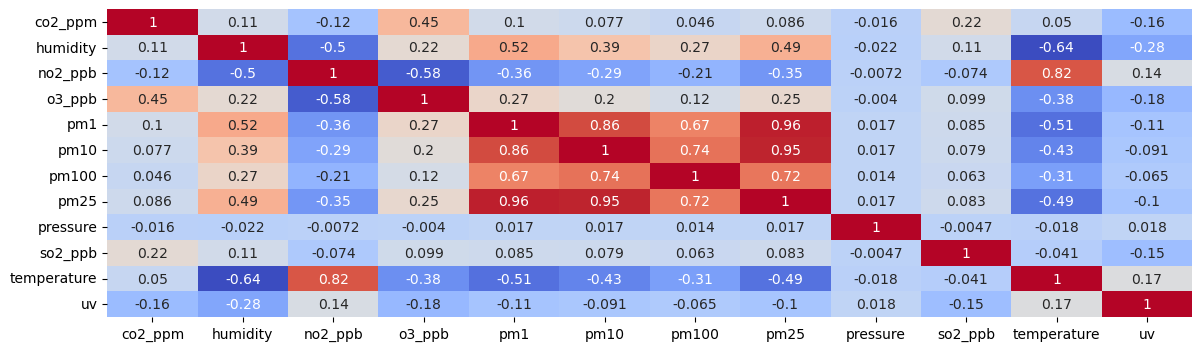

In [388]:
corr = df.corr(method='pearson')
plt.figure(figsize=(14, 4))
heatmap = sns.heatmap(corr, annot=True, cbar=False, cmap='coolwarm')
heatmap.set_xlabel('')
heatmap.set_ylabel('')
plt.show()

З мапи видно, що є помітна кореляція між різними видами pm; температурою та вологістю; температурою і NO2. Надалі
зосередимось на них.

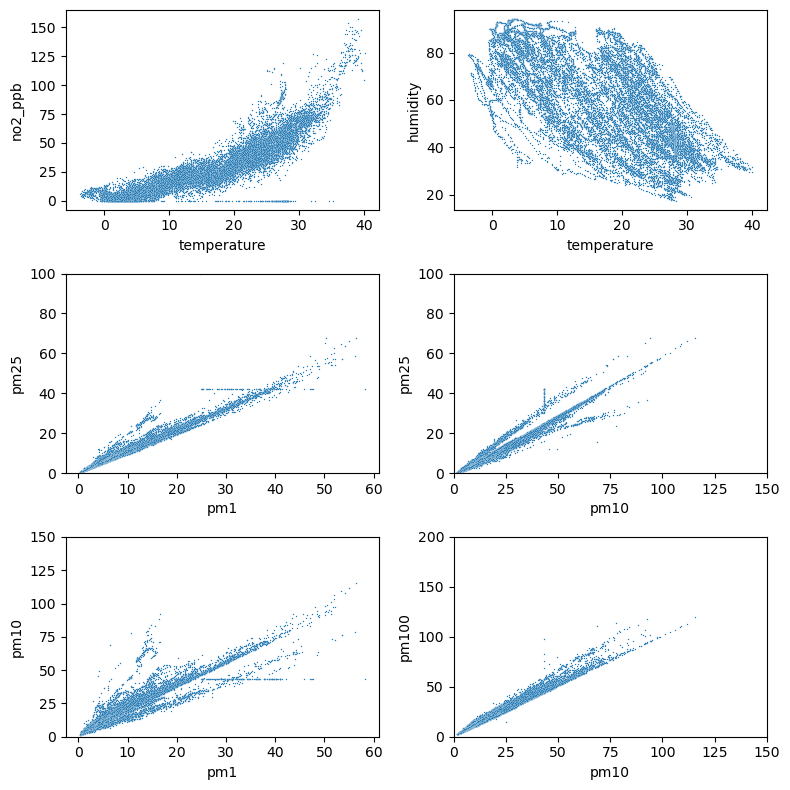

In [389]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
sns.scatterplot(x=df['temperature'], y=df['no2_ppb'], s=1, ax=axes[0, 0])
sns.scatterplot(x=df['temperature'], y=df['humidity'], s=1, ax=axes[0, 1])
sns.scatterplot(x=df['pm1'], y=df['pm25'], s=1, ax=axes[1, 0])
axes[1, 0].set_ylim(0, 100)
sns.scatterplot(x=df['pm10'], y=df['pm25'], s=1, ax=axes[1, 1])
axes[1, 1].set_xlim(0, 150)
axes[1, 1].set_ylim(0, 100)
sns.scatterplot(x=df['pm1'], y=df['pm10'], s=1, ax=axes[2, 0])
axes[2, 0].set_ylim(0, 150)
sns.scatterplot(x=df['pm10'], y=df['pm100'], s=1, ax=axes[2, 1])
axes[2, 1].set_xlim(0, 150)
axes[2, 1].set_ylim(0, 200)
plt.tight_layout()
plt.show()

Як можна побачити, графіки підтверджують залежність. Для пари "температура-вологість" коефіціент занадто
малий для побудови інформативної регресії; а для пари "температура-NO2" графік нагадує квадратичну залежність,
але на проміжку 0-30 градусів, де зосереджена більшість значень, це майже пряма, що, враховуючи
не надто великий коефіцієнт, потеційно призведе до втрати точності на проміжку від 30 - тому для тренування
моделі попередньо усереднимо значення.

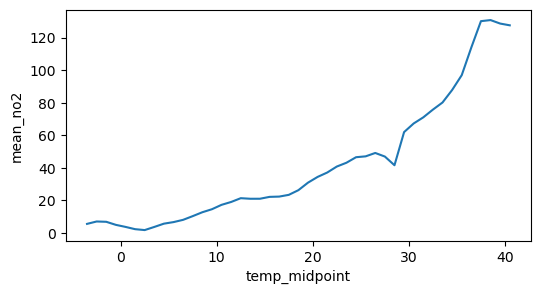

In [390]:
bins = list(range(-10, 42, 1))

df['temp_range'] = pd.cut(df['temperature'], bins)
df['temp_midpoint'] = df['temp_range'].apply(lambda x: (x.left + x.right)/2)
no2_df = df.groupby('temp_midpoint', observed=True)['no2_ppb'].mean().reset_index()
no2_df.columns = ['temp_midpoint', 'mean_no2']
no2_df.dropna(subset='mean_no2', inplace=True)

fig, axes = plt.subplots(1, 1, figsize=(6, 3))
sns.lineplot(x=no2_df['temp_midpoint'], y=no2_df['mean_no2'], ax=axes)
plt.show()



Тут як модель оберемо поліноміальну регресію з коефіцієнтом 2 і тренуємо її на спеціально підготовлених даних.

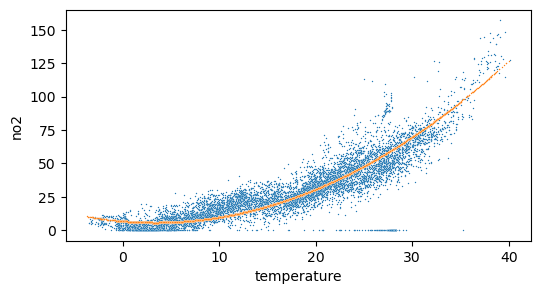

In [391]:
model_no2 = LinearRegression()
temp_train_array = no2_df[['temp_midpoint']].to_numpy()
no2_train_array = no2_df[['mean_no2']].to_numpy()

no2_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(temp_train_array)

model_no2.fit(no2_features, no2_train_array)

temp_array = df[['temperature']].to_numpy()
temp_array = temp_array.reshape((-1,1))
no2_array = df[['no2_ppb']].to_numpy()
temp, temp_test, no2, no2_test = train_test_split(temp_array, no2_array, test_size=0.5, random_state=20, shuffle=True)
poly_temp_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(temp_test)
no2_predicted = model_no2.predict(poly_temp_test)

fig, axes = plt.subplots(1, 1, figsize=(6, 3))
sns.scatterplot(x=temp.flatten(), y=no2.flatten(), ax=axes, s=1)
sns.scatterplot(x=temp_test.flatten(), y=no2_predicted.flatten(), ax=axes, s=1)
axes.set_xlabel('temperature')
axes.set_ylabel('no2')
plt.show()

In [392]:
print("R2 score: {:.2f}".format(r2_score(no2_test, no2_predicted)))
print("RMSE score: {:.2f}".format(root_mean_squared_error(no2_test, no2_predicted)))

R2 score: 0.70
RMSE score: 13.01


Така модель більш-менш точно може передбачувати потрібні значення, хоч і
трохи відхиляється при високих температурах - що не проблема,
враховуючи, наскільки рідко досягається цей рівень. Тепер зосередимо увагу на залежностях між pm, наприклад pm1/pm25 і pm10/pm25.

In [393]:
col = ['loggrd_at', 'pm1', 'pm10', 'pm25', 'pm100']
pm_df = df.drop(columns=[c for c in df.columns if c not in col], inplace=False)
pm_df.head(5)

phenomenon,pm1,pm10,pm100,pm25
logged_at,,,,
2024-02-10 16:30:00,19.60,26.31,27.00,18.96
2024-02-10 16:45:00,17.40,23.40,24.40,16.70
2024-02-10 17:00:00,15.90,21.83,22.60,15.54
2024-02-10 17:15:00,15.82,21.20,22.36,15.28
2024-02-10 17:30:00,15.70,21.00,22.00,15.10


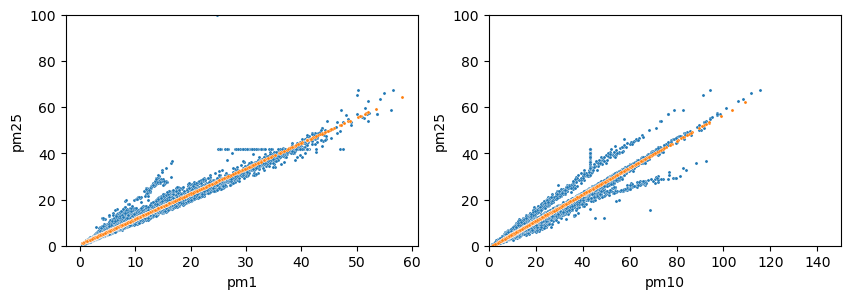

In [394]:
model_1_25 = LinearRegression()
model_10_25 = LinearRegression()
pm1_array = pm_df[['pm1']].to_numpy()
pm1_array = pm1_array.reshape((-1,1))
pm10_array = pm_df[['pm10']].to_numpy()
pm10_array = pm10_array.reshape((-1,1))

pm25_array = pm_df[['pm25']].to_numpy()
pm1_train, pm1_test, pm_1_25_train, pm_1_25_test = train_test_split(pm1_array, pm25_array, test_size=0.25, random_state=20, shuffle=True)
pm10_train, pm10_test, pm_10_25_train, pm_10_25_test = train_test_split(pm10_array, pm25_array, test_size=0.25, random_state=20, shuffle=True)

model_1_25.fit(pm1_train, pm_1_25_train)
pm_1_25_predicted = model_1_25.predict(pm1_test)
model_10_25.fit(pm10_train, pm_10_25_train)
pm_10_25_predicted = model_10_25.predict(pm10_test)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.scatterplot(x=pm1_train.flatten(), y=pm_1_25_train.flatten(), s=5, ax=axes[0])
sns.scatterplot(x = pm1_test.flatten(), y=pm_1_25_predicted.flatten(), s=5, ax=axes[0])
axes[0].set_ylim(0, 100)
axes[0].set_xlabel('pm1')
axes[0].set_ylabel('pm25')

sns.scatterplot(x=pm10_train.flatten(), y=pm_10_25_train.flatten(), s=5, ax=axes[1])
sns.scatterplot(x = pm10_test.flatten(), y=pm_10_25_predicted.flatten(), s=5, ax=axes[1])
axes[1].set_ylim(0, 100)
axes[1].set_xlim(0, 150)
axes[1].set_xlabel('pm10')
axes[1].set_ylabel('pm25')
plt.show()

In [395]:
print("R2 score for pm1/pm25: {:.2f}".format(r2_score(pm_1_25_test, pm_1_25_predicted)))
print("R2 score for pm10/pm25: {:.2f}".format(r2_score(pm_10_25_test, pm_10_25_predicted)))
print("RMSE score for pm1/pm25: {:.2f}".format(root_mean_squared_error(pm_1_25_test, pm_1_25_predicted)))
print("RMSE score for pm10/pm25: {:.2f}".format(root_mean_squared_error(pm_10_25_test, pm_10_25_predicted)))

R2 score for pm1/pm25: 0.97
R2 score for pm10/pm25: 0.91
RMSE score for pm1/pm25: 1.63
RMSE score for pm10/pm25: 2.84


Як висновок, ми можемо достатньо точно передбачувати кількість частинок більшого розміру за кількістю меншого, що може бути
корисним за умов обмеженості датчиків. Далі розглянемо залежність pm25 від часу дня.

In [396]:
df = df.reset_index() 
df['day'] = df['logged_at'].dt.date
df['time'] = df['logged_at'].dt.time
date_df = df.pivot_table(index='day', columns='time', values='pm25')
date_df = date_df.bfill()
date_df = date_df.reset_index().melt(id_vars='day', var_name='time', value_name='pm25')
date_df['minutes'] = date_df['time'].apply(lambda x: x.hour * 60 + x.minute)
date_df.head(5)

,day,time,pm25,minutes
0,2024-02-10,00:00:00,42.0,0
1,2024-02-11,00:00:00,42.0,0
2,2024-02-12,00:00:00,42.0,0
3,2024-02-13,00:00:00,42.0,0
4,2024-02-14,00:00:00,42.0,0


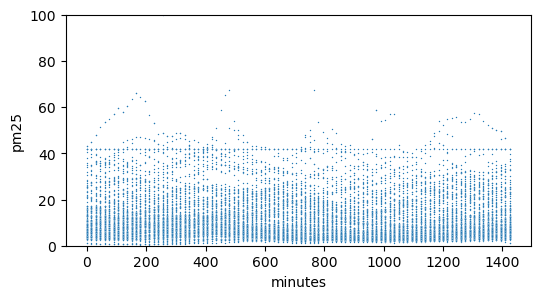

In [397]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
sns.scatterplot(x=date_df['minutes'], y=date_df['pm25'], s=1, ax=axes)
axes.set_ylim(0, 100)
plt.show()

Як бачимо, ніякої залежності немає, тому будувати модель не має сенсу: з неї не можна буде отримати корисної інформації.